# SHAP

In [1]:
from pathlib import Path

import pandas as pd

from src.config import Config
from src.evaluation import run_shap
from src.train import ModelTrainer
from src.utils import set_seed

In [2]:
cfg = Config(Path("../config/config.yaml"))
rng = set_seed(cfg.runtime.seed)

2025-08-18 18:19:09,560 - INFO - src.utils - Global random seed set to 42


In [3]:
model_path = Path(cfg.model.path)
model, preprocessor, y_scaler, _ = ModelTrainer.load(str(model_path))

In [4]:
X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test.parquet")

In [5]:
preds = model.predict(preprocessor.transform(X_test))
print("pred shape:", preds.shape)
print("mean:", preds.mean(), "std:", preds.std())

pred shape: (194, 30)
mean: target_0     0.008313
target_1     0.002149
target_2     0.008031
target_3     0.012934
target_4     0.005215
target_5    -0.003858
target_6     0.009028
target_7     0.011524
target_8     0.012559
target_9     0.006475
target_10    0.007188
target_11   -0.001098
target_12    0.013460
target_13    0.004961
target_14    0.007631
target_15    0.004836
target_16    0.002944
target_17    0.008793
target_18    0.005184
target_19    0.006770
target_20    0.015619
target_21    0.002264
target_22    0.013070
target_23    0.002780
target_24   -0.001461
target_25    0.005180
target_26   -0.000352
target_27    0.005356
target_28   -0.000961
target_29    0.004825
dtype: float64 std: target_0     0.068891
target_1     0.024890
target_2     0.033474
target_3     0.020642
target_4     0.030313
target_5     0.028295
target_6     0.015632
target_7     0.047270
target_8     0.055006
target_9     0.020212
target_10    0.037337
target_11    0.026136
target_12    0.048025
target

In [6]:
X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test.parquet")
shap_values = run_shap(model, preprocessor, X_test, 50, 20, y_scaler)

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
import shap

def plot_beeswarm_all_features(sv, output_idx: int | None = None):
    """
    Beeswarm showing ALL features. If multi-output, pass output_idx or it will show the first.
    """
    if sv.values.ndim == 3:
        i = 0 if output_idx is None else output_idx
        s = sv[:, :, i]
    else:
        s = sv
    n_feat = s.values.shape[1]
    shap.plots.beeswarm(s, max_display=n_feat, plot_size=(8, max(6, 0.3 * n_feat)))

def plot_beeswarm_all_outputs(sv):
    """
    One beeswarm per output (useful for horizon-wise inspection).
    """
    if sv.values.ndim == 3:
        for i in range(sv.values.shape[2]):
            print(f"Output/Horizon #{i}")
            n_feat = sv[:, :, i].values.shape[1]
            shap.plots.beeswarm(sv[:, :, i], max_display=n_feat, plot_size=(8, max(6, 0.3 * n_feat)))
    else:
        plot_beeswarm_all_features(sv)


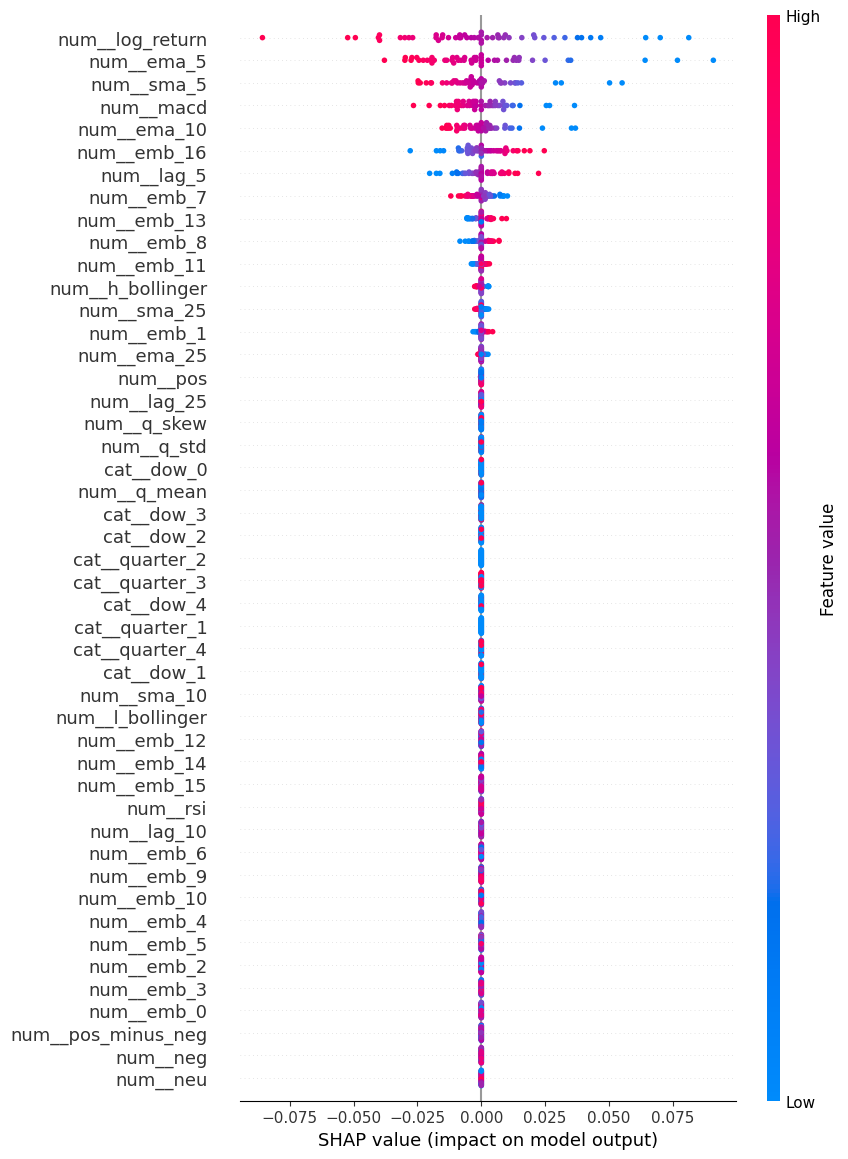

Output/Horizon #0


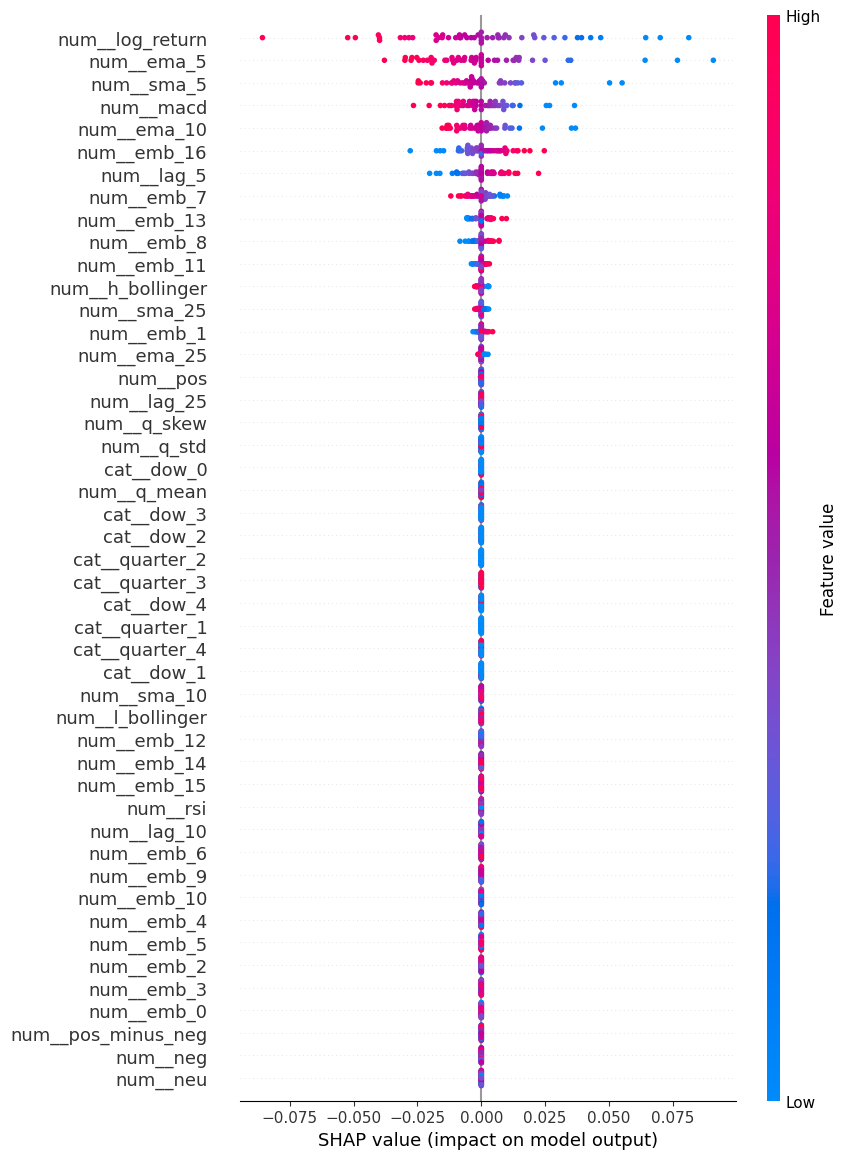

Output/Horizon #1


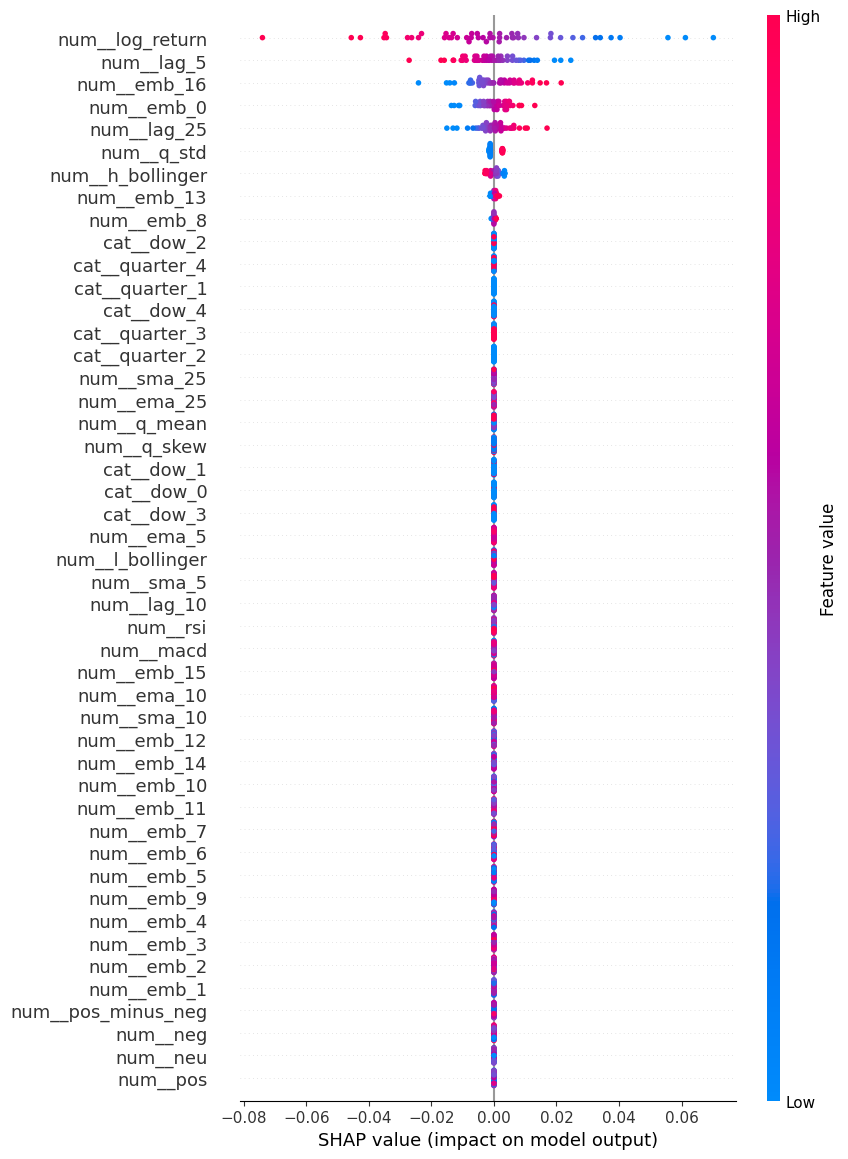

Output/Horizon #2


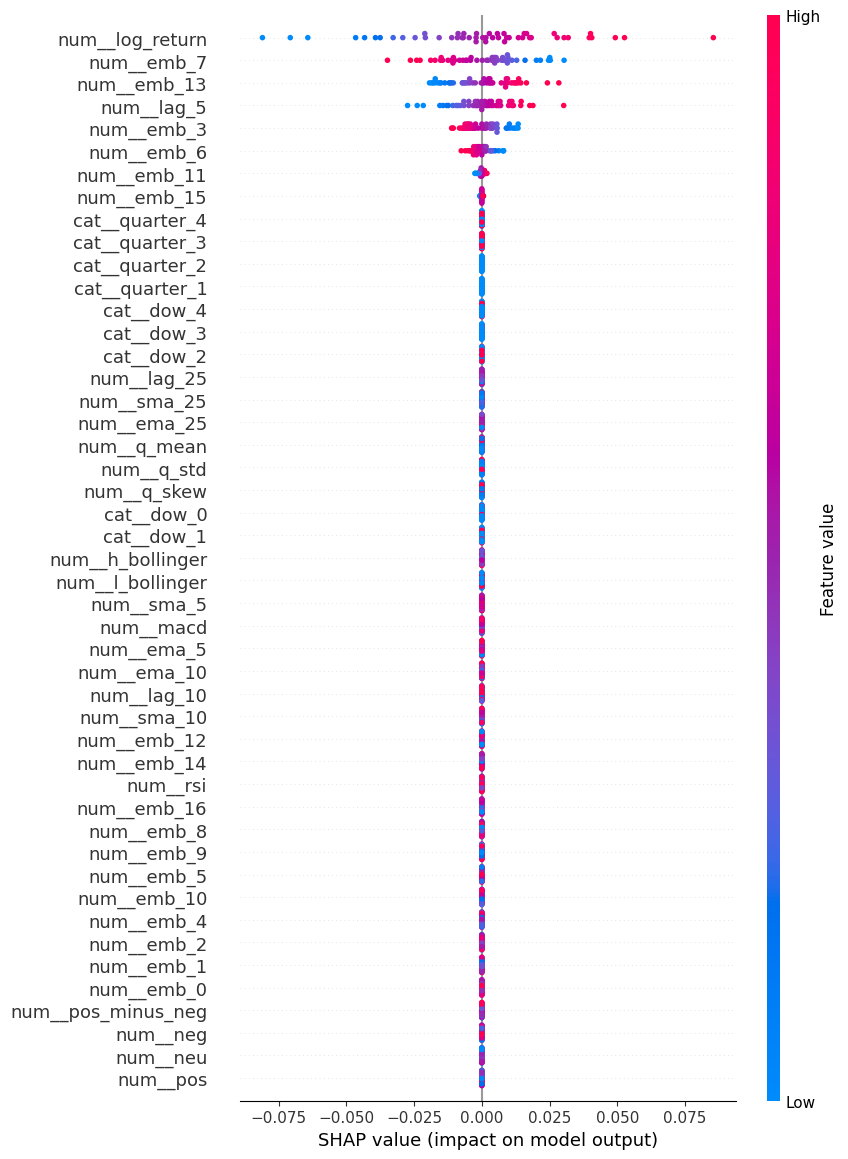

Output/Horizon #3


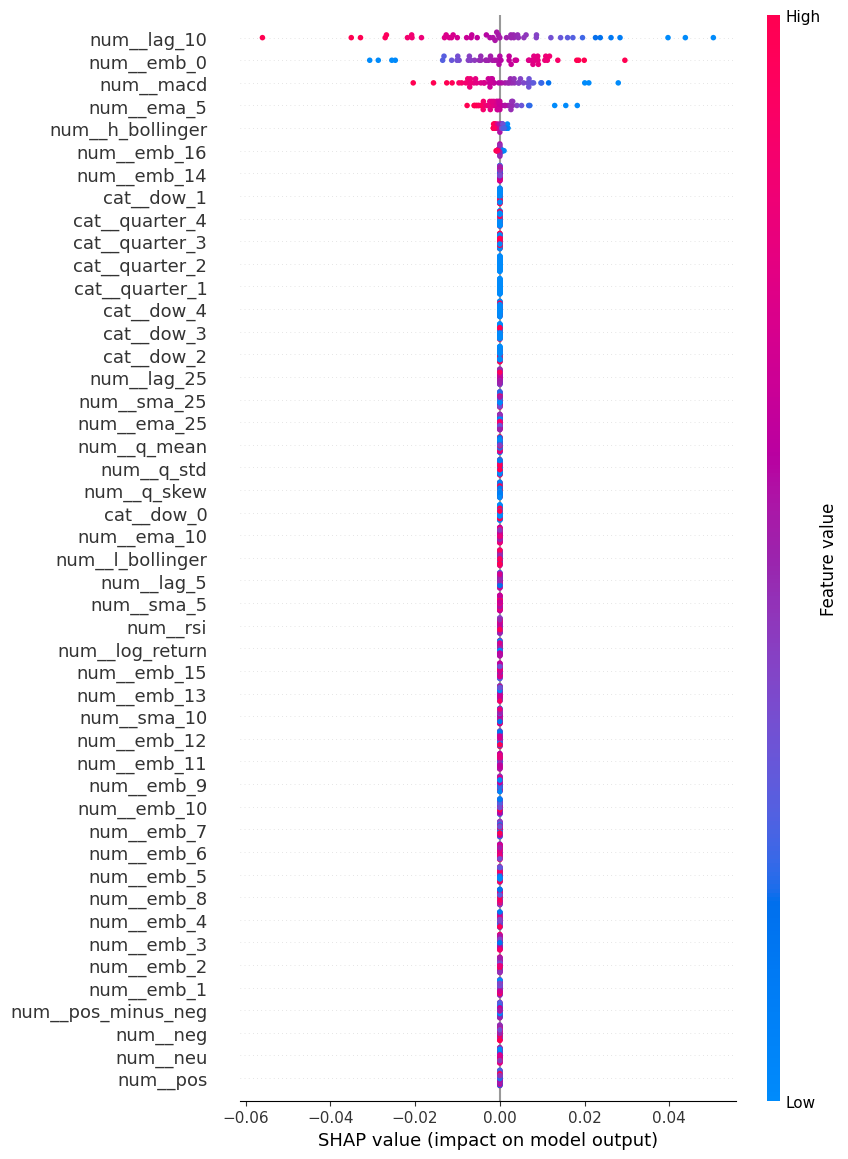

Output/Horizon #4


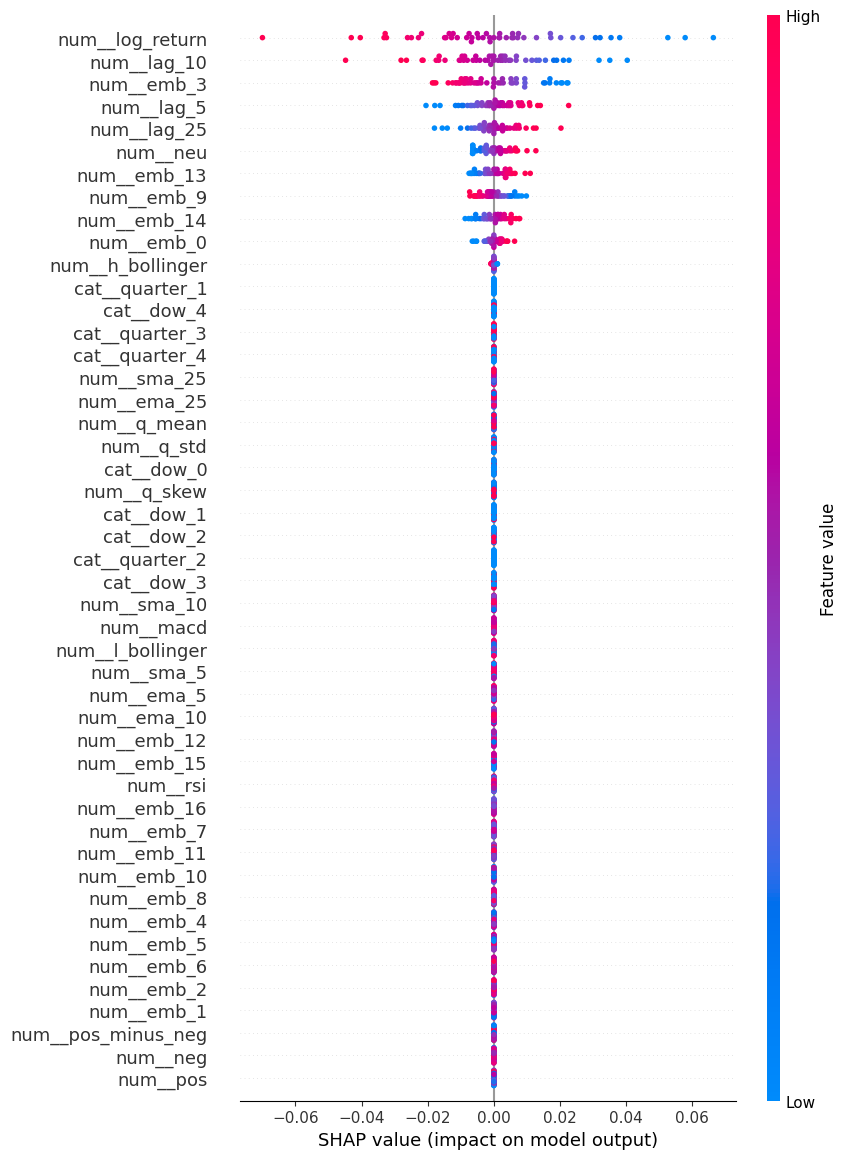

Output/Horizon #5


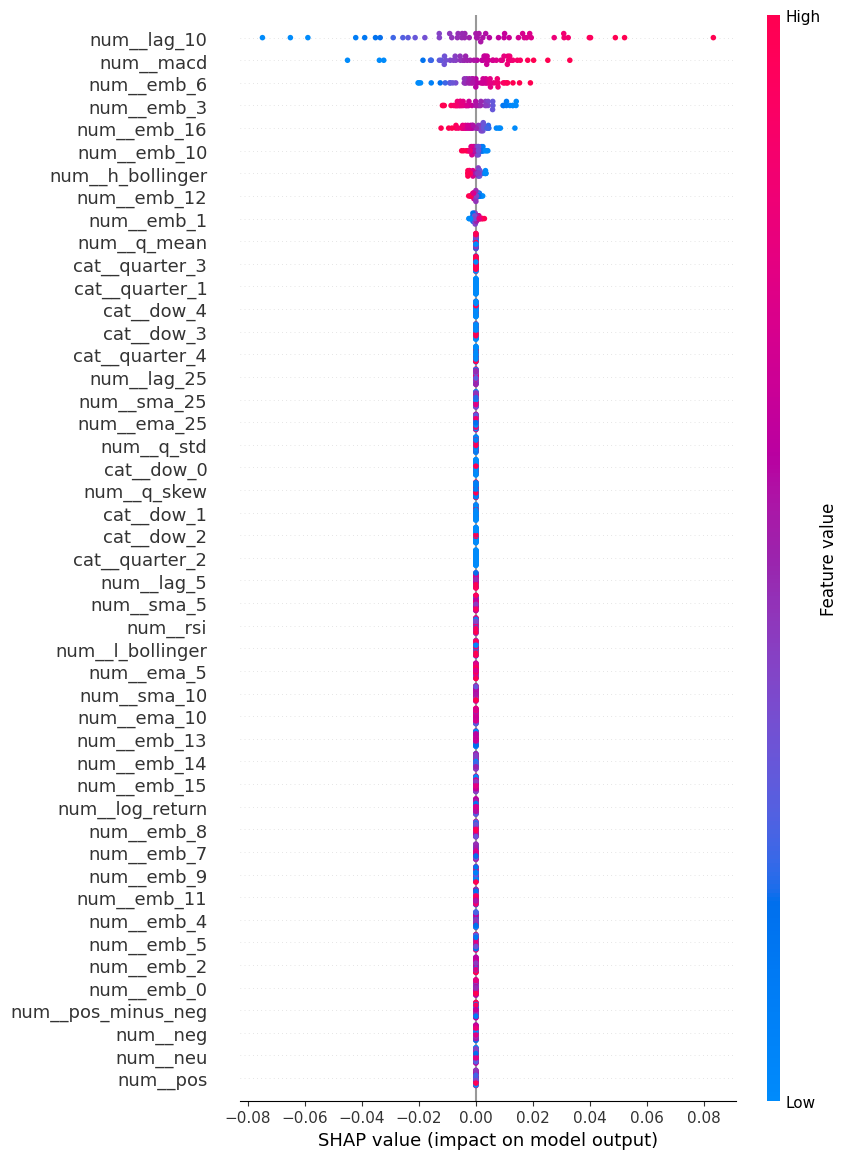

Output/Horizon #6


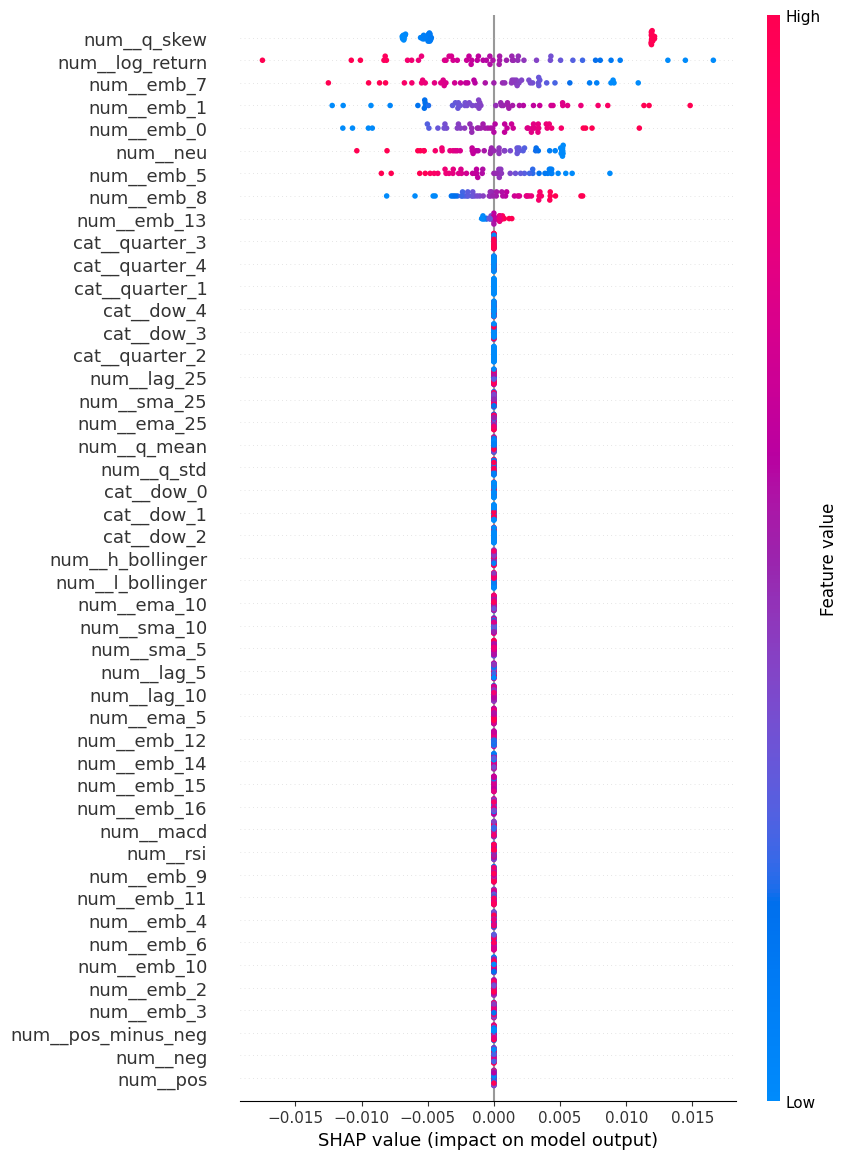

Output/Horizon #7


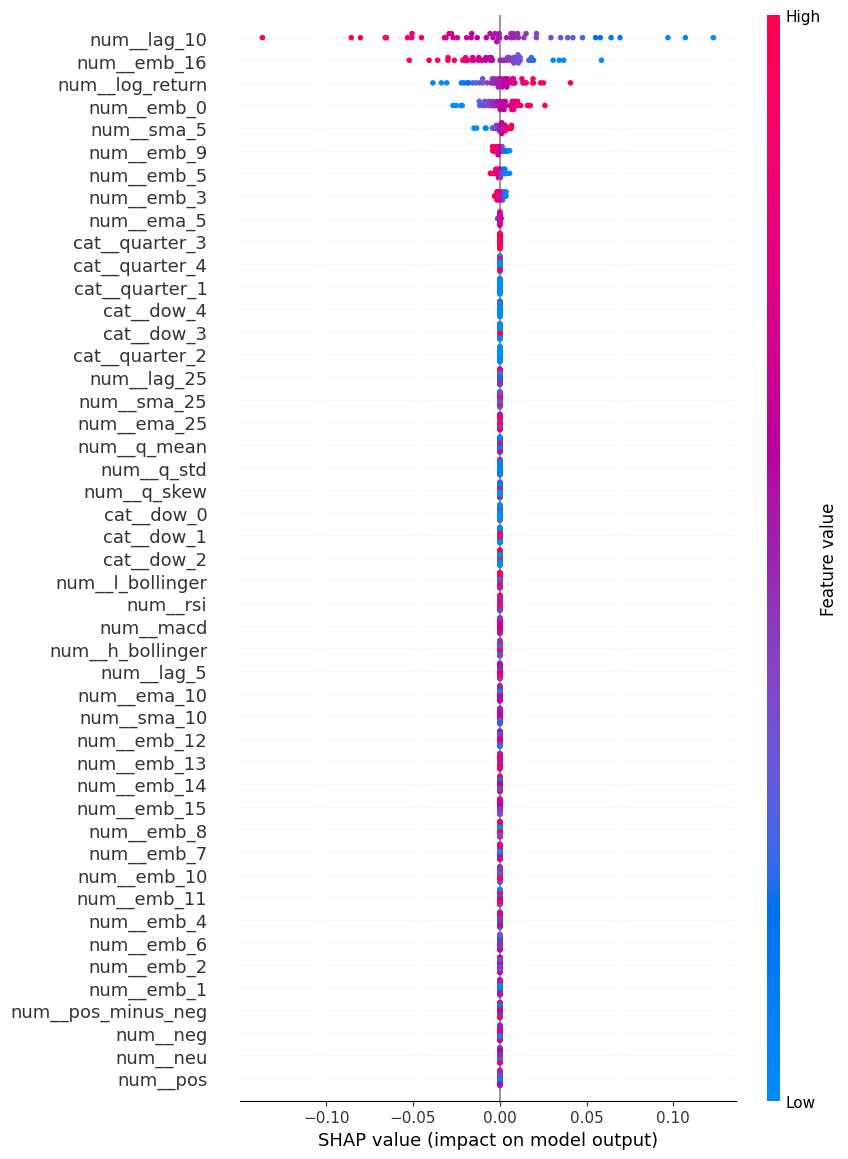

Output/Horizon #8


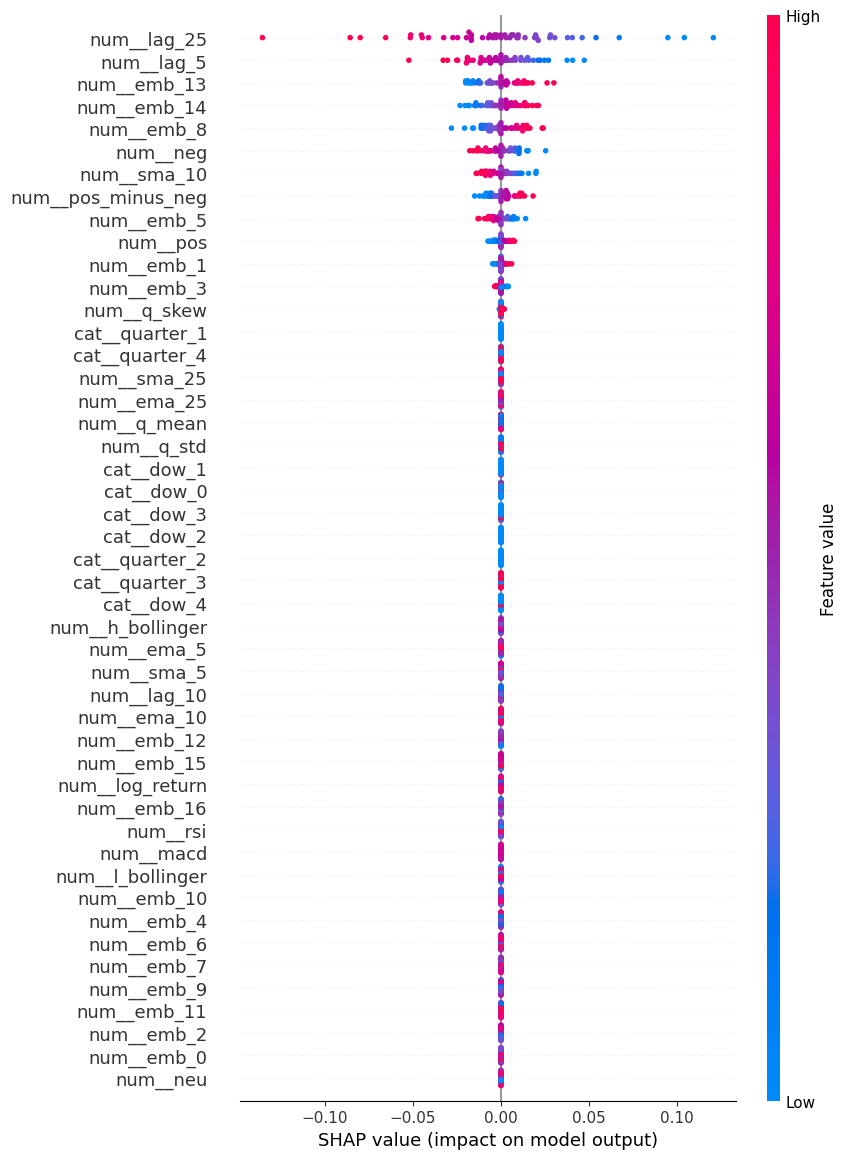

Output/Horizon #9


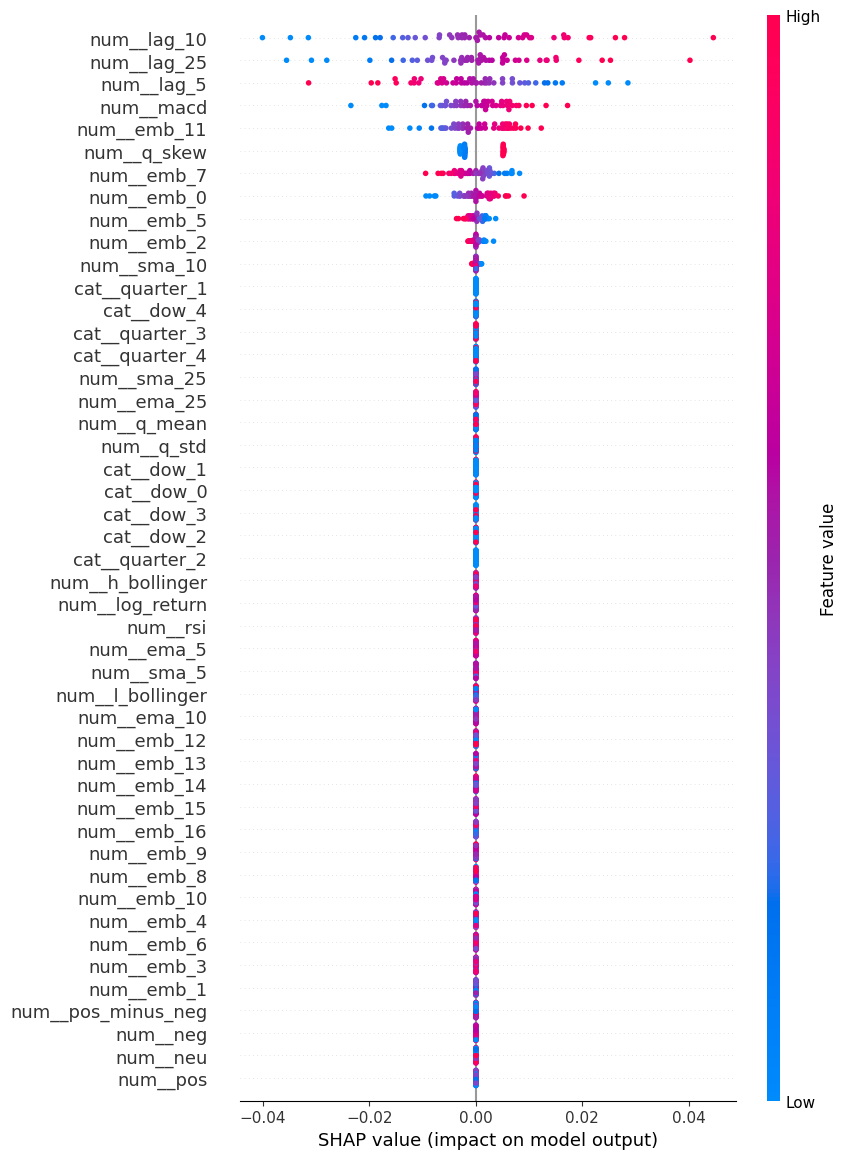

Output/Horizon #10


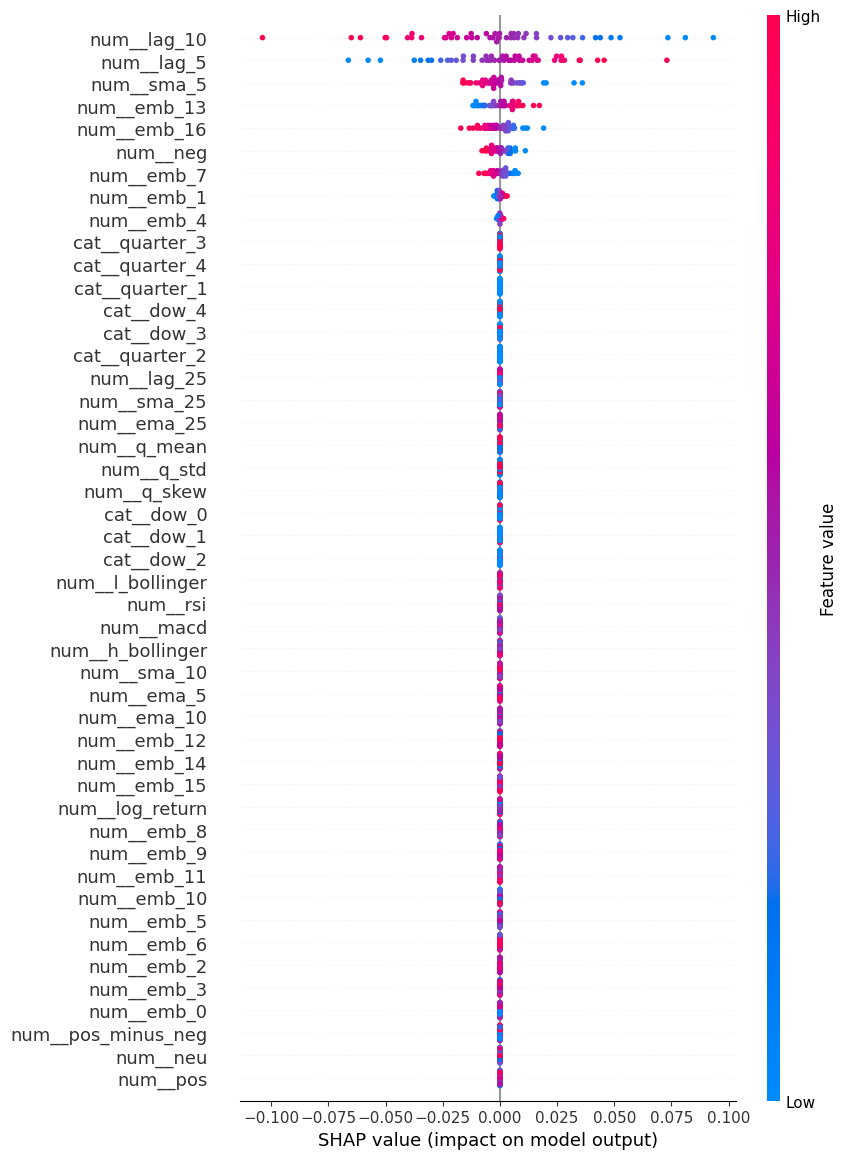

Output/Horizon #11


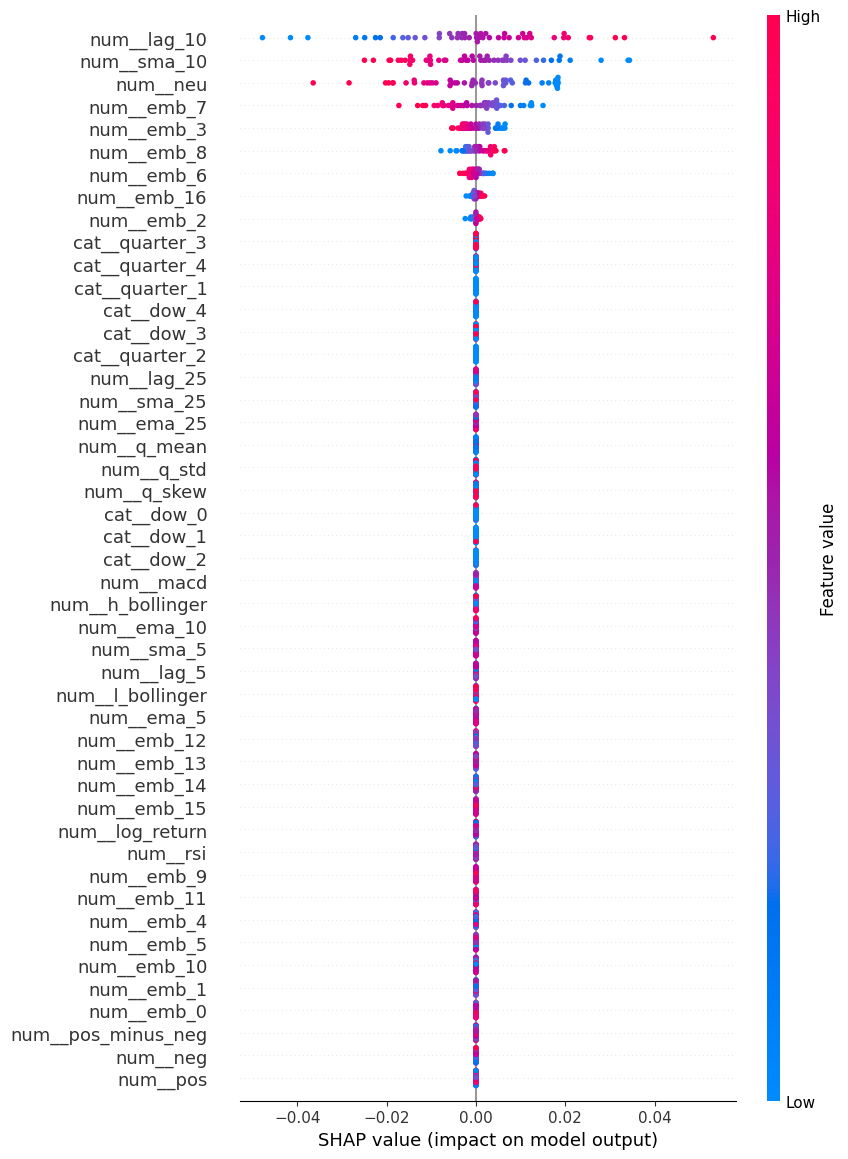

Output/Horizon #12


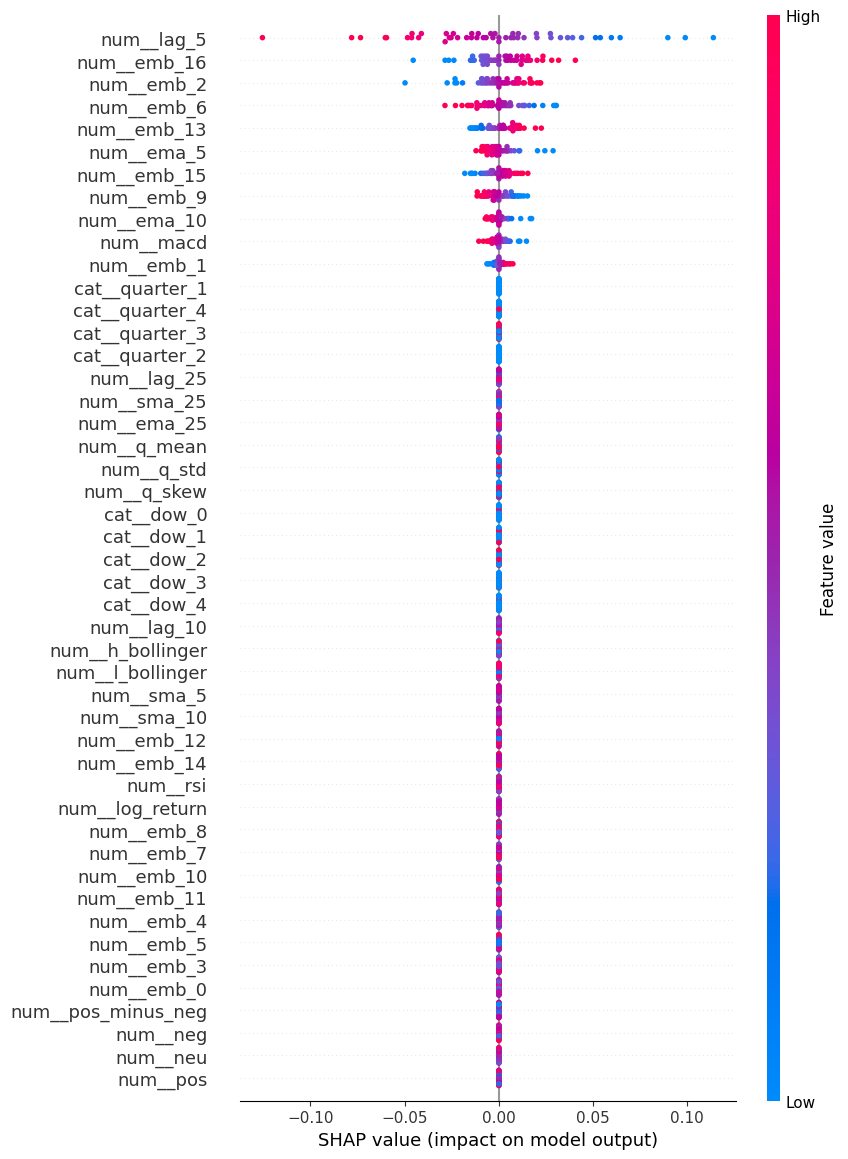

Output/Horizon #13


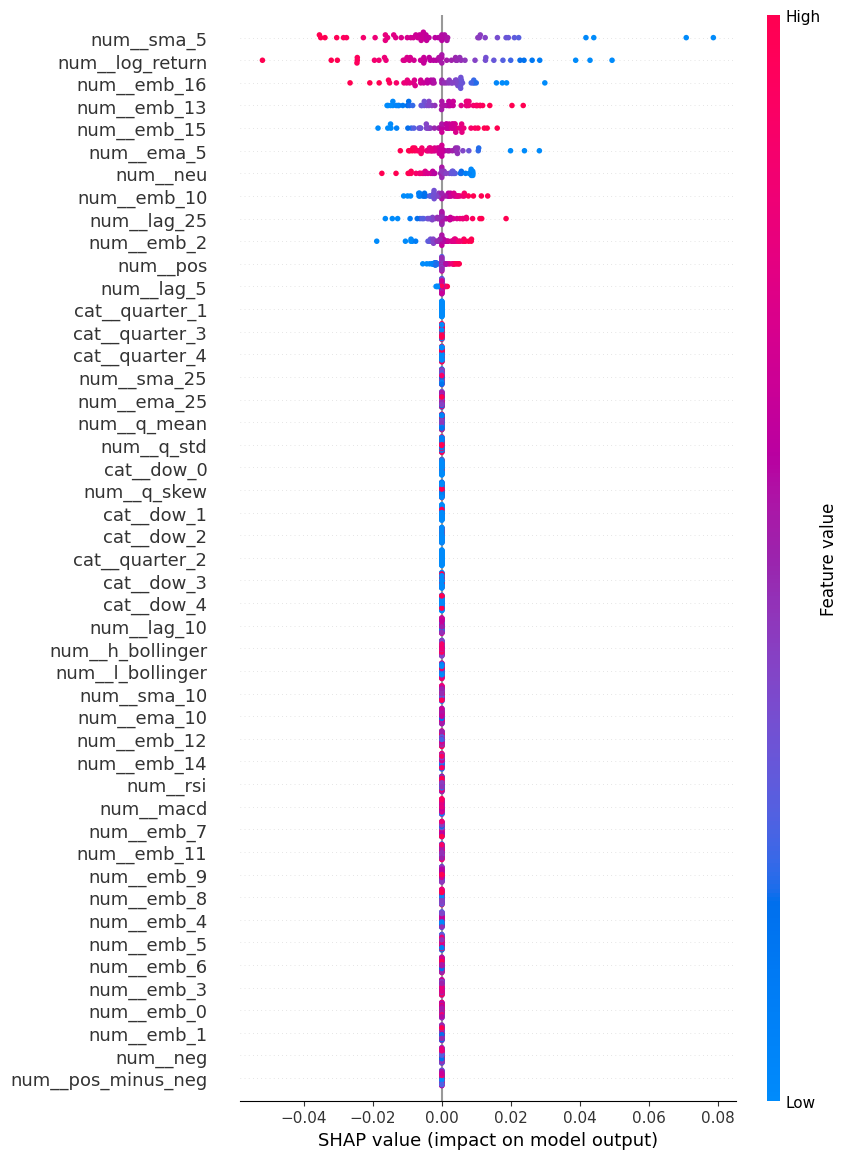

Output/Horizon #14


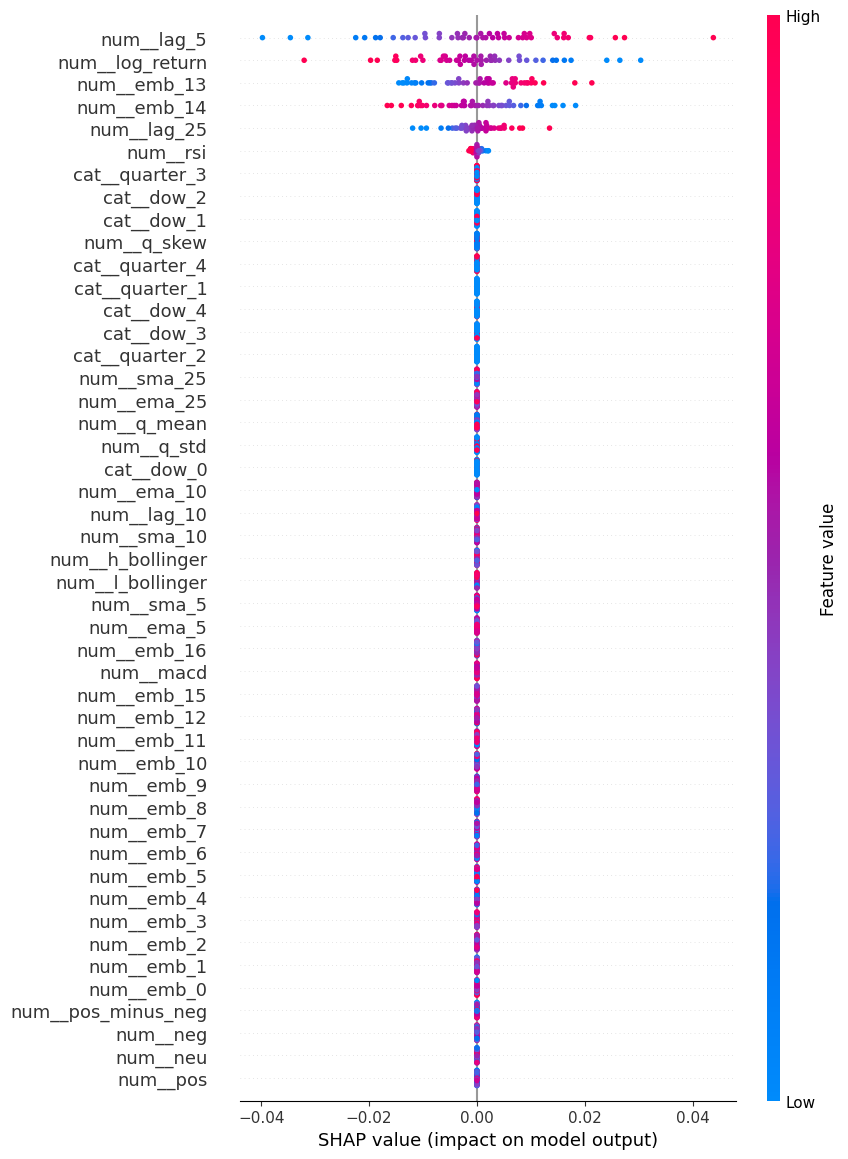

Output/Horizon #15


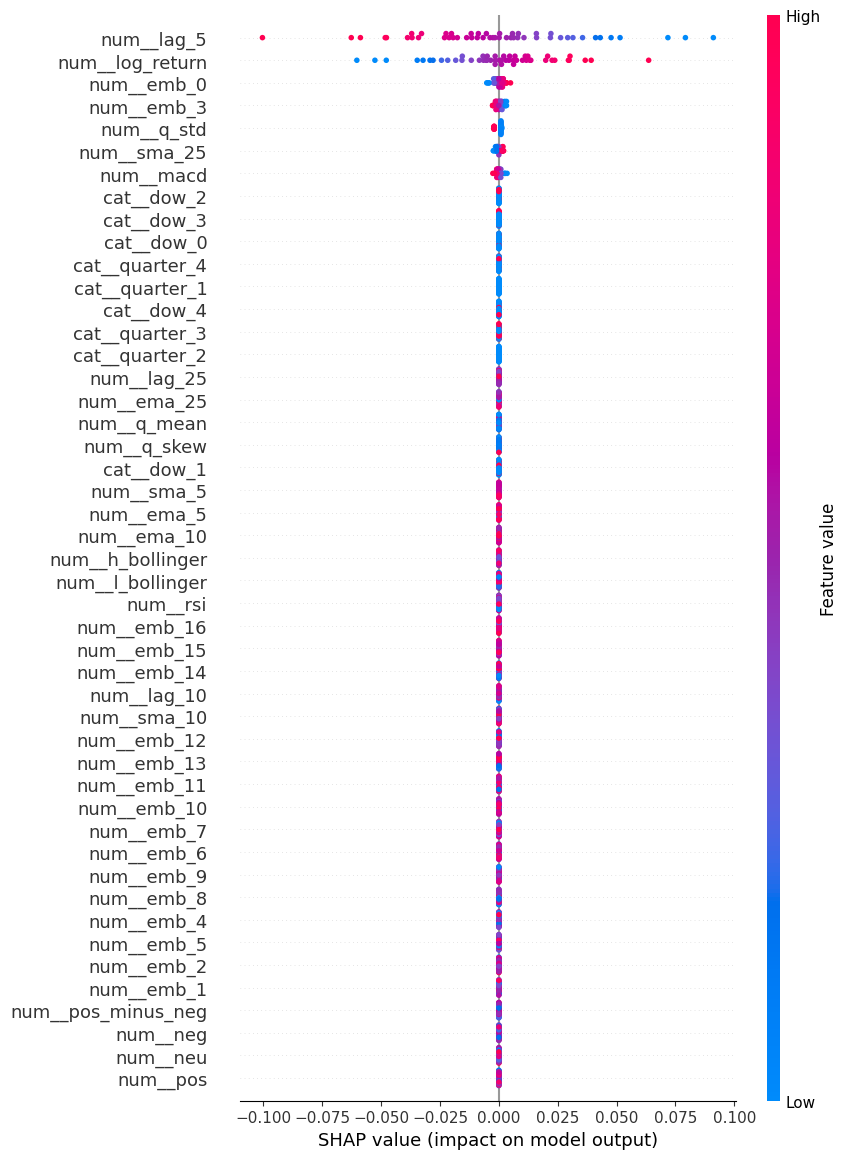

Output/Horizon #16


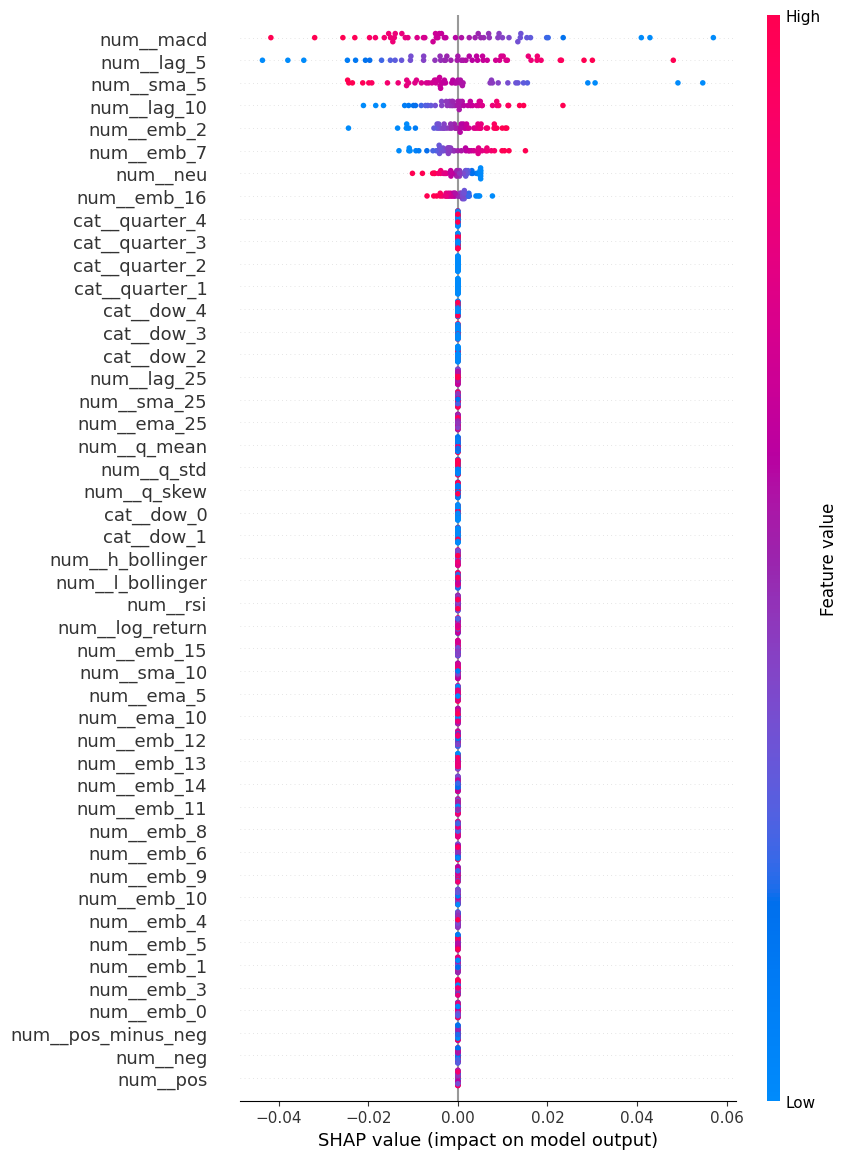

Output/Horizon #17


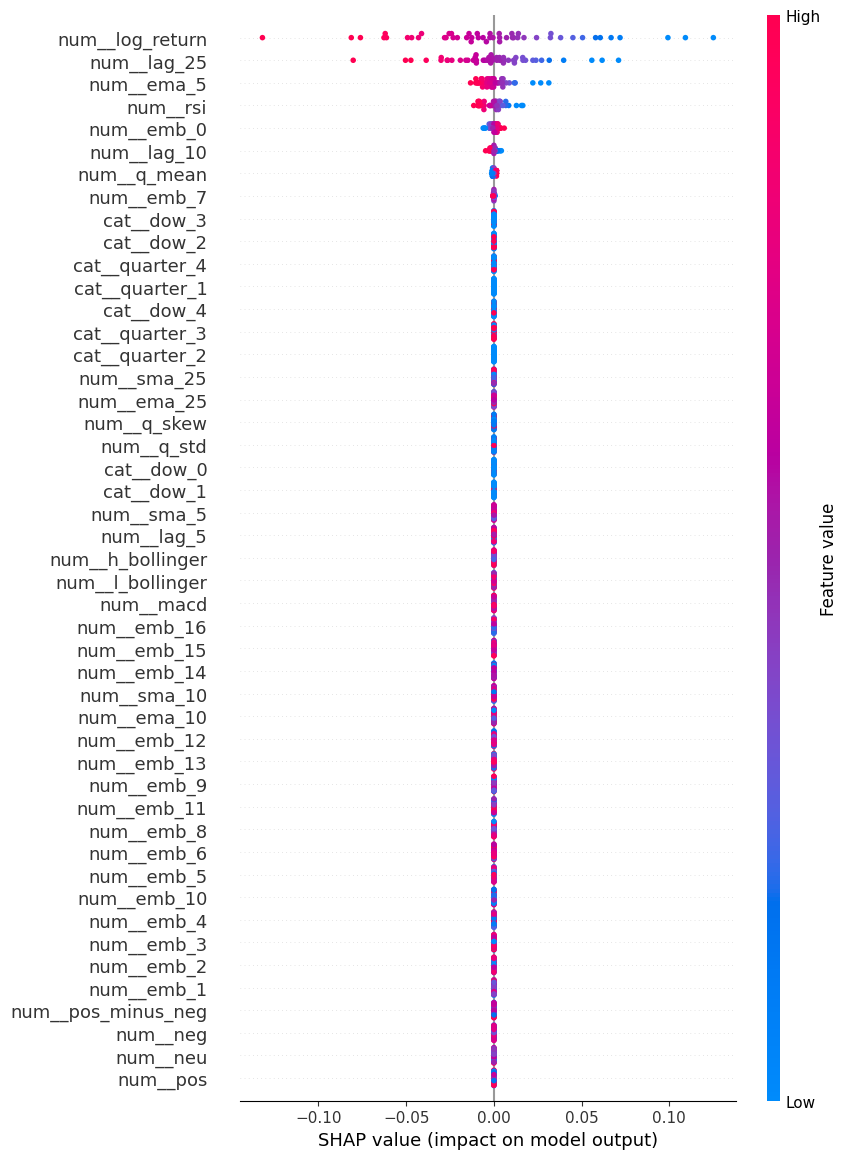

Output/Horizon #18


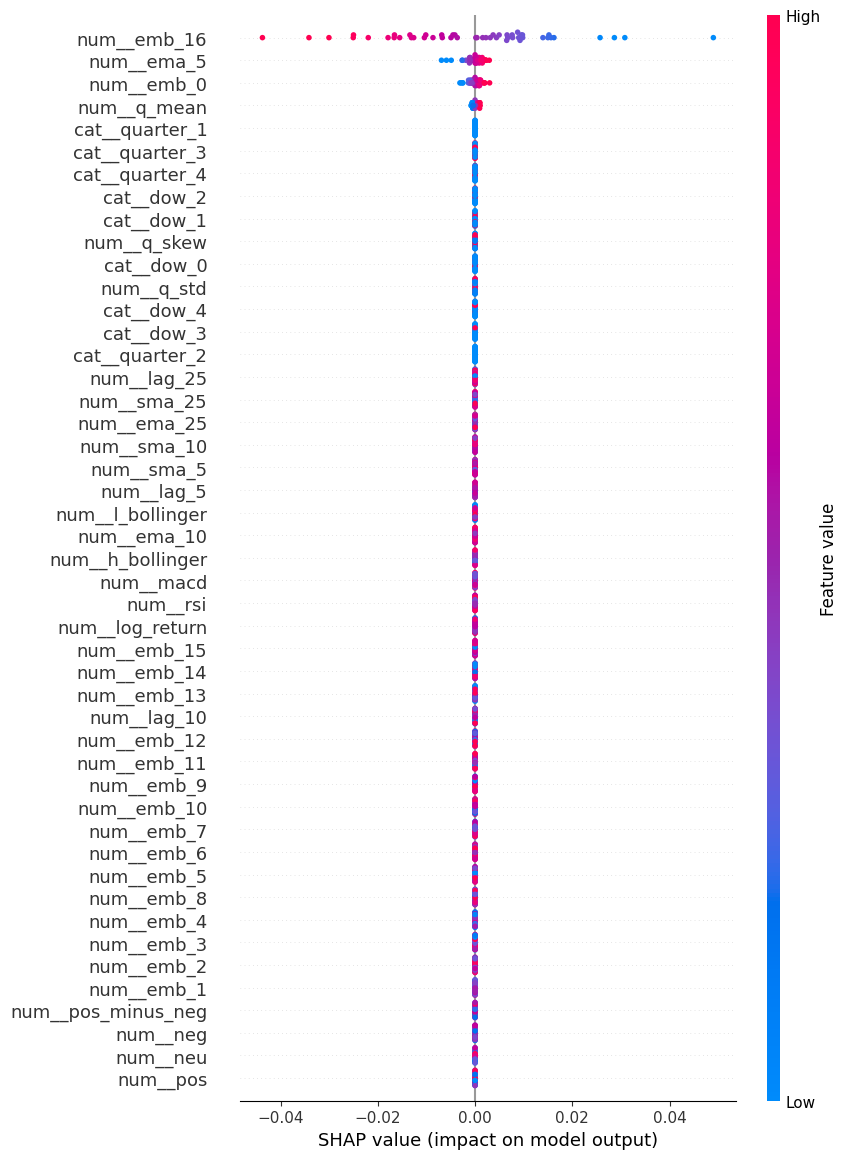

Output/Horizon #19


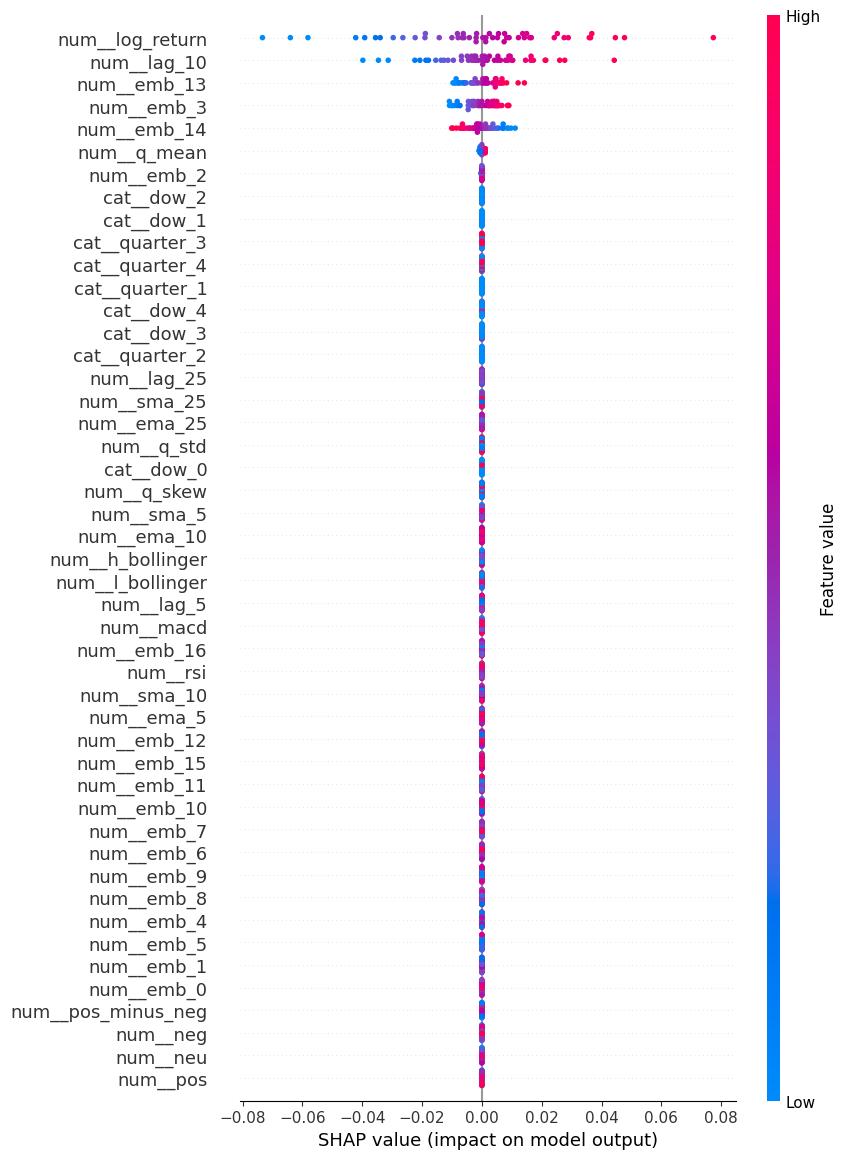

Output/Horizon #20


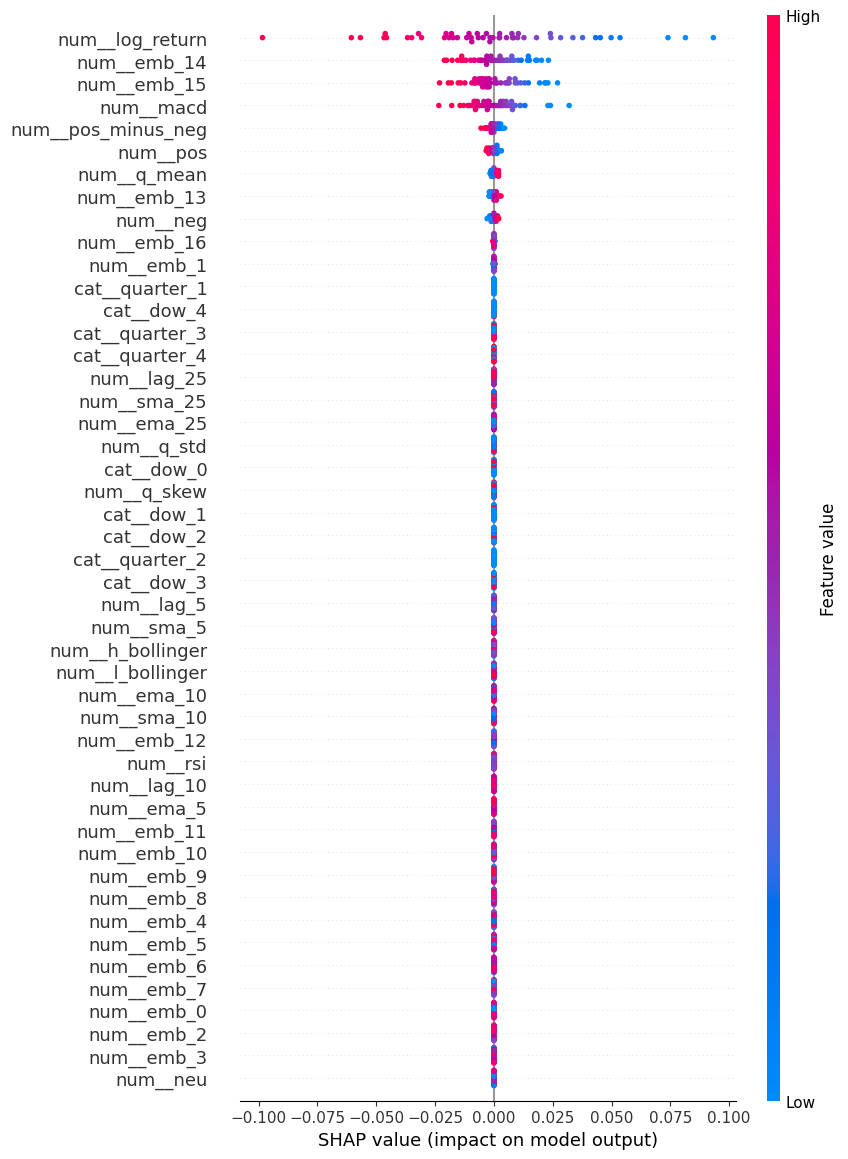

Output/Horizon #21


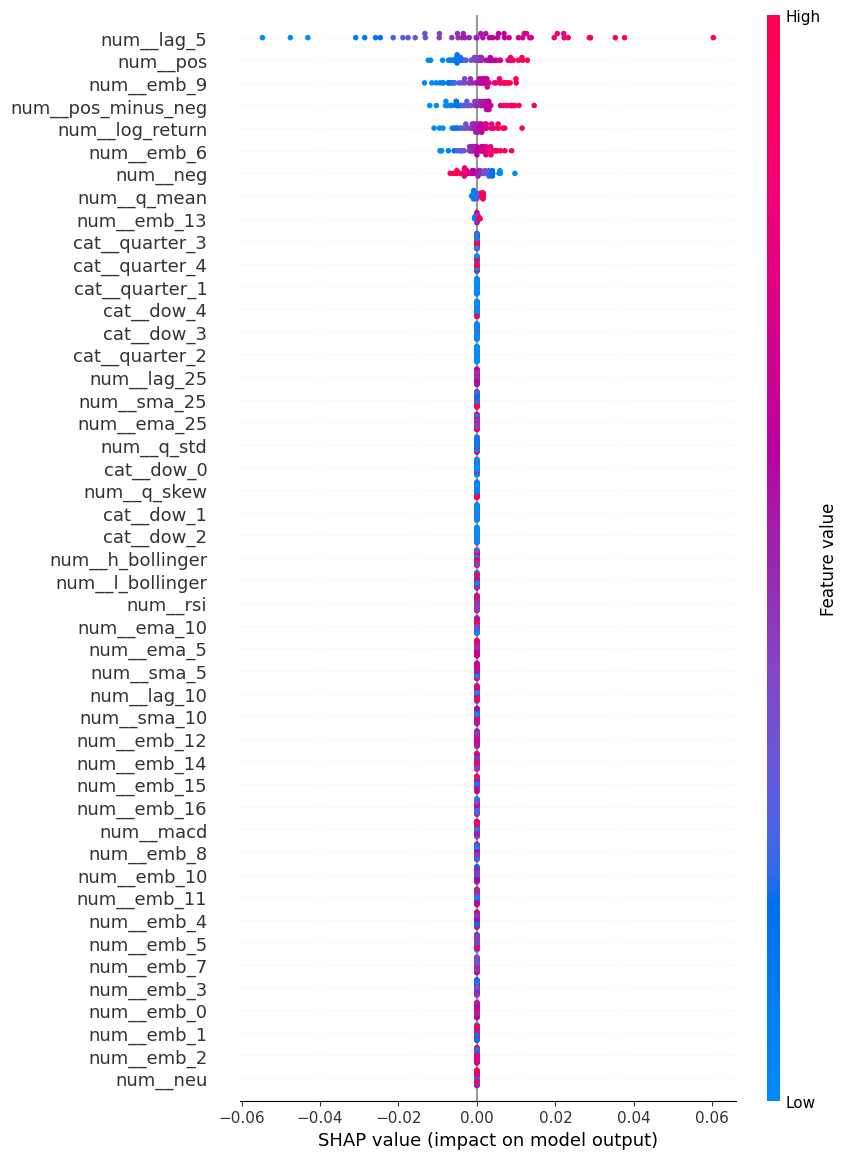

Output/Horizon #22


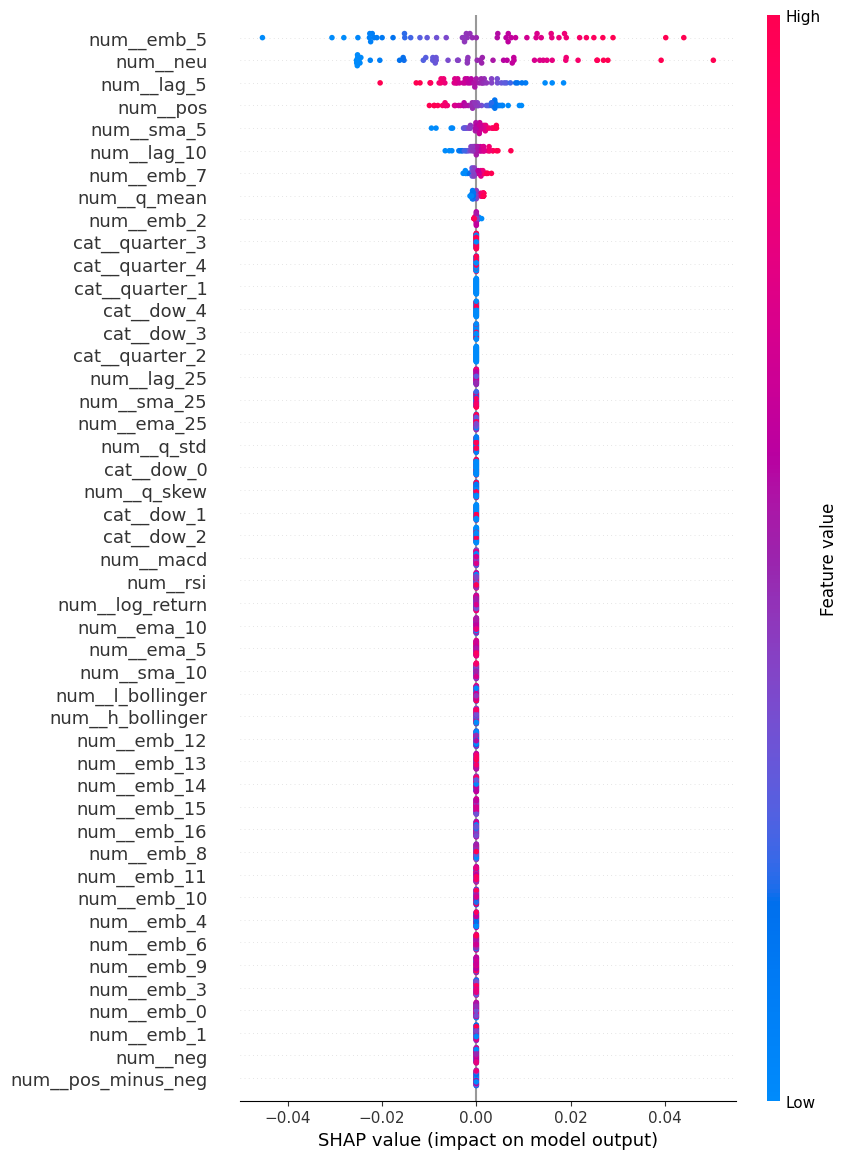

Output/Horizon #23


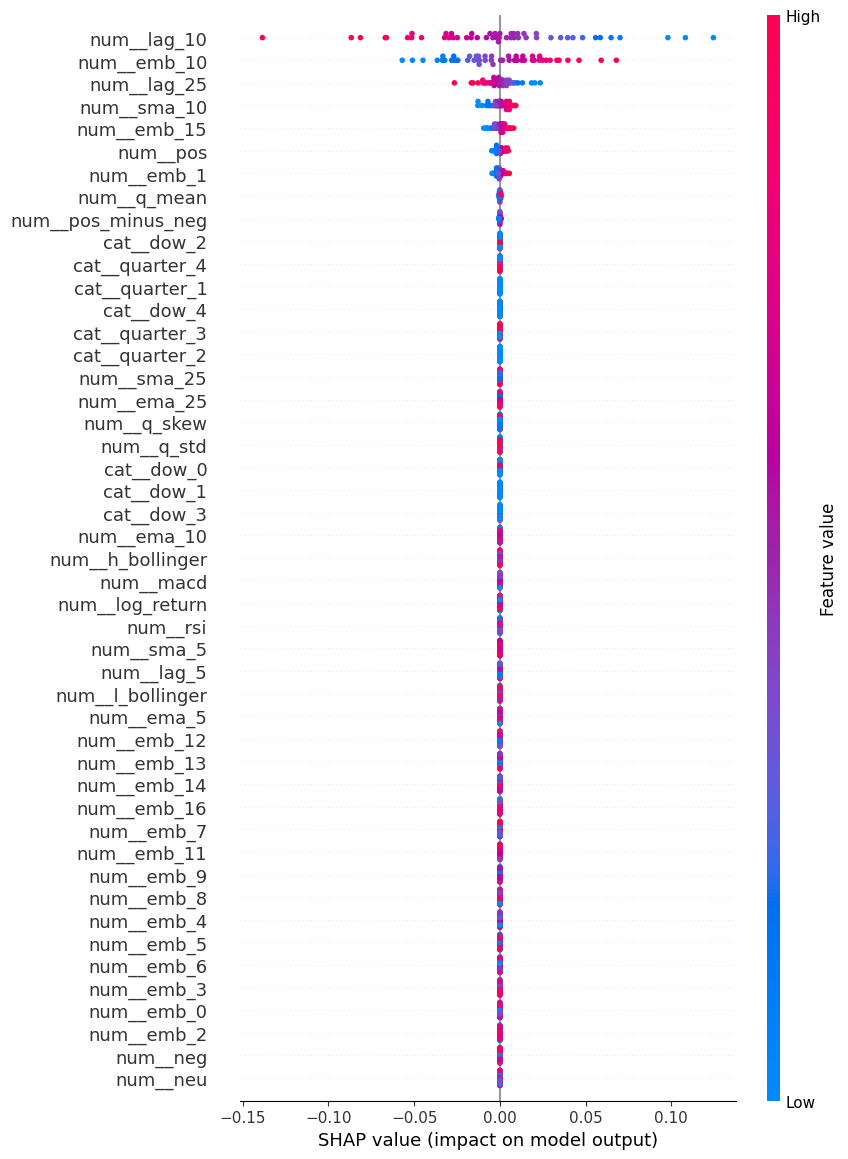

Output/Horizon #24


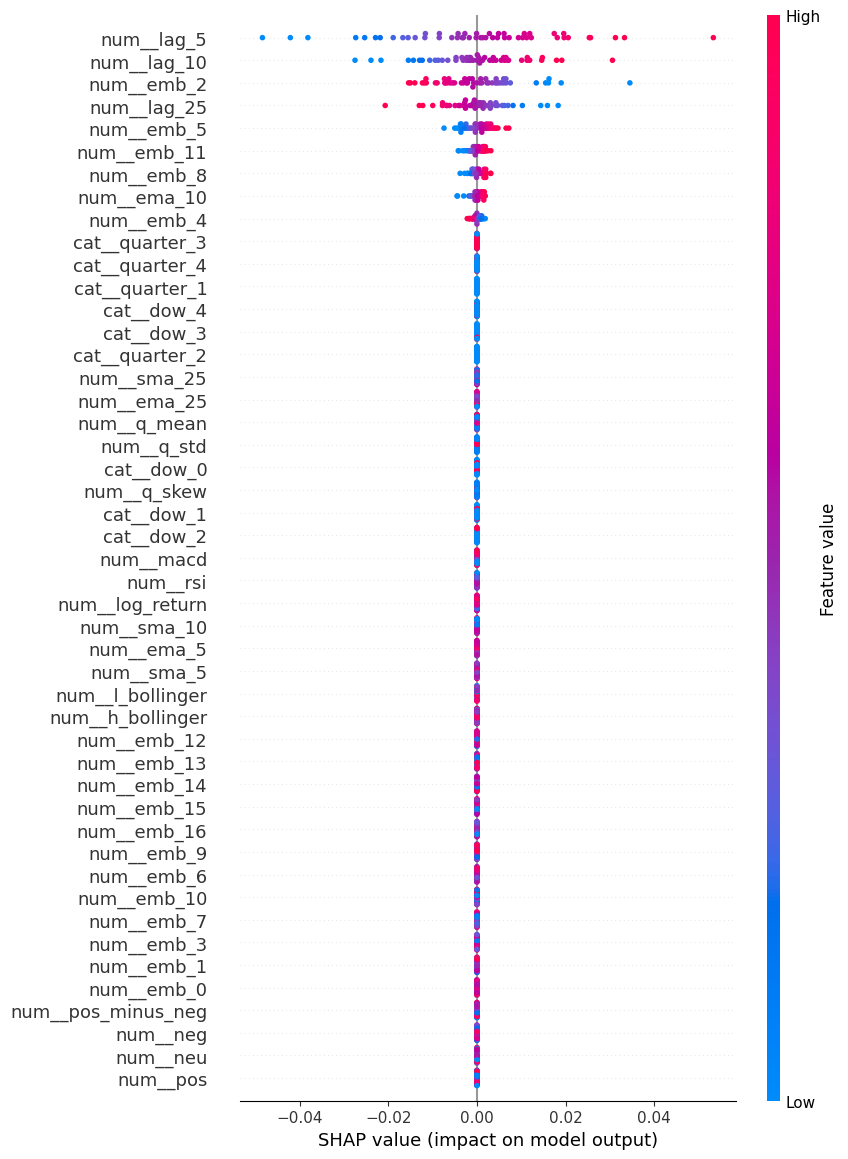

Output/Horizon #25


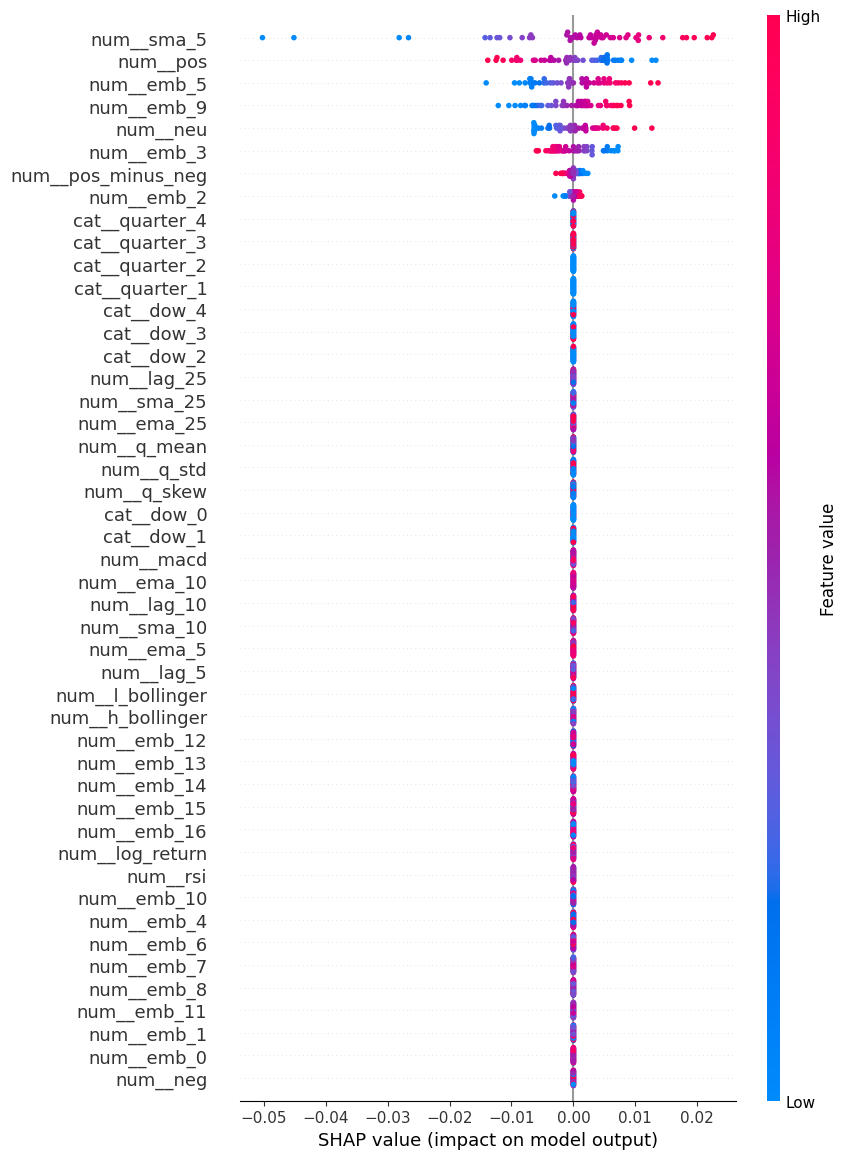

Output/Horizon #26


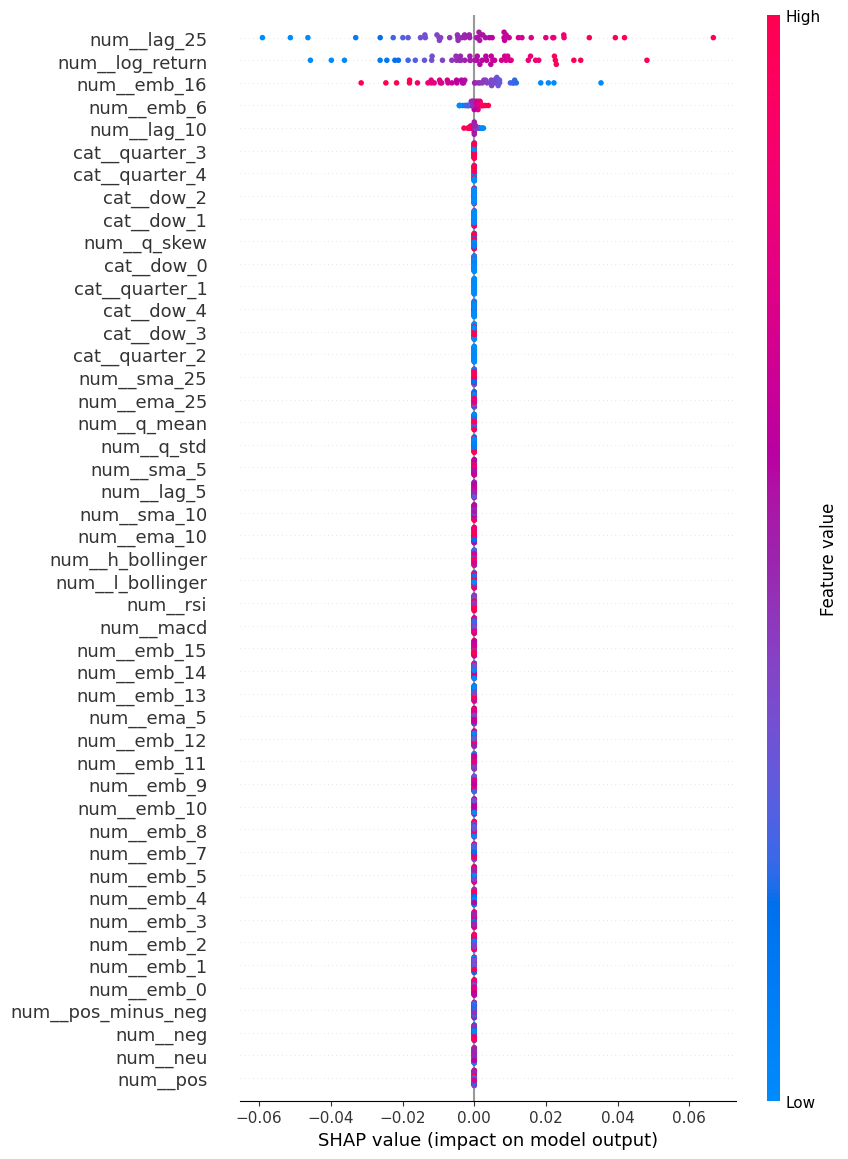

Output/Horizon #27


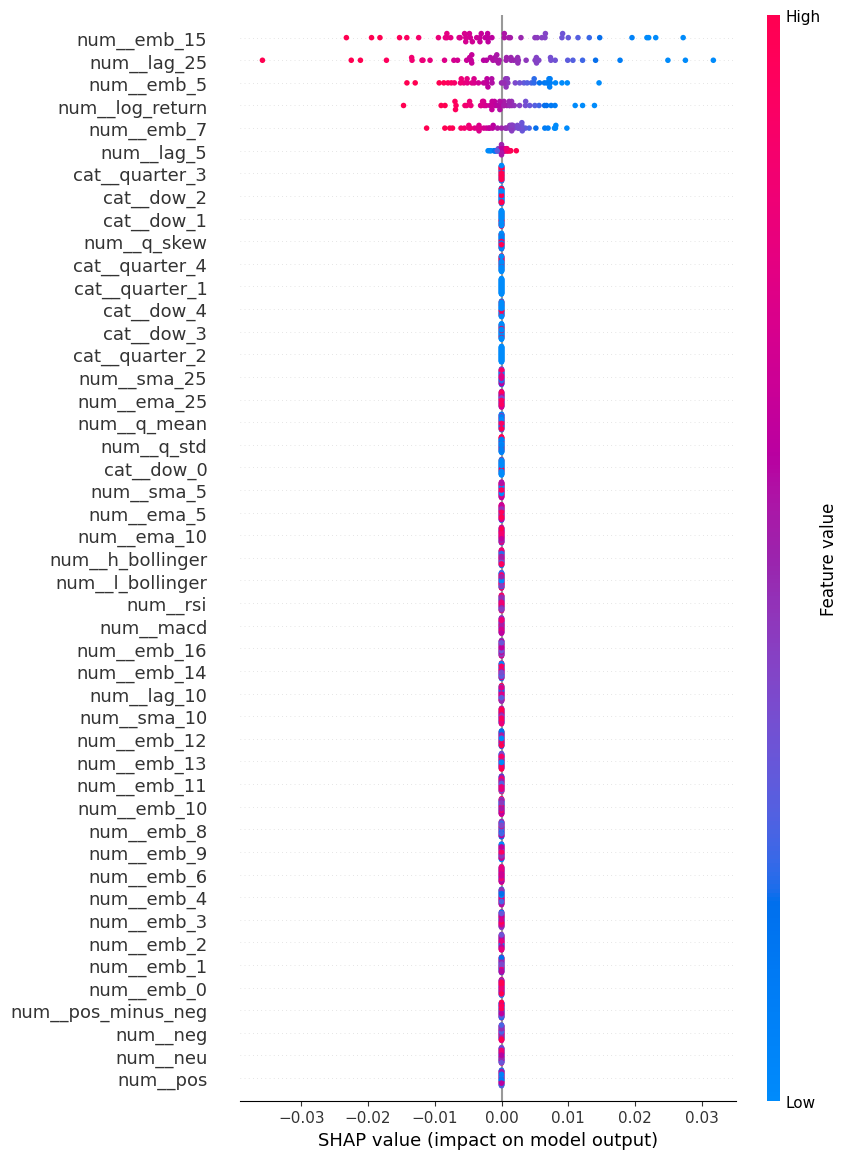

Output/Horizon #28


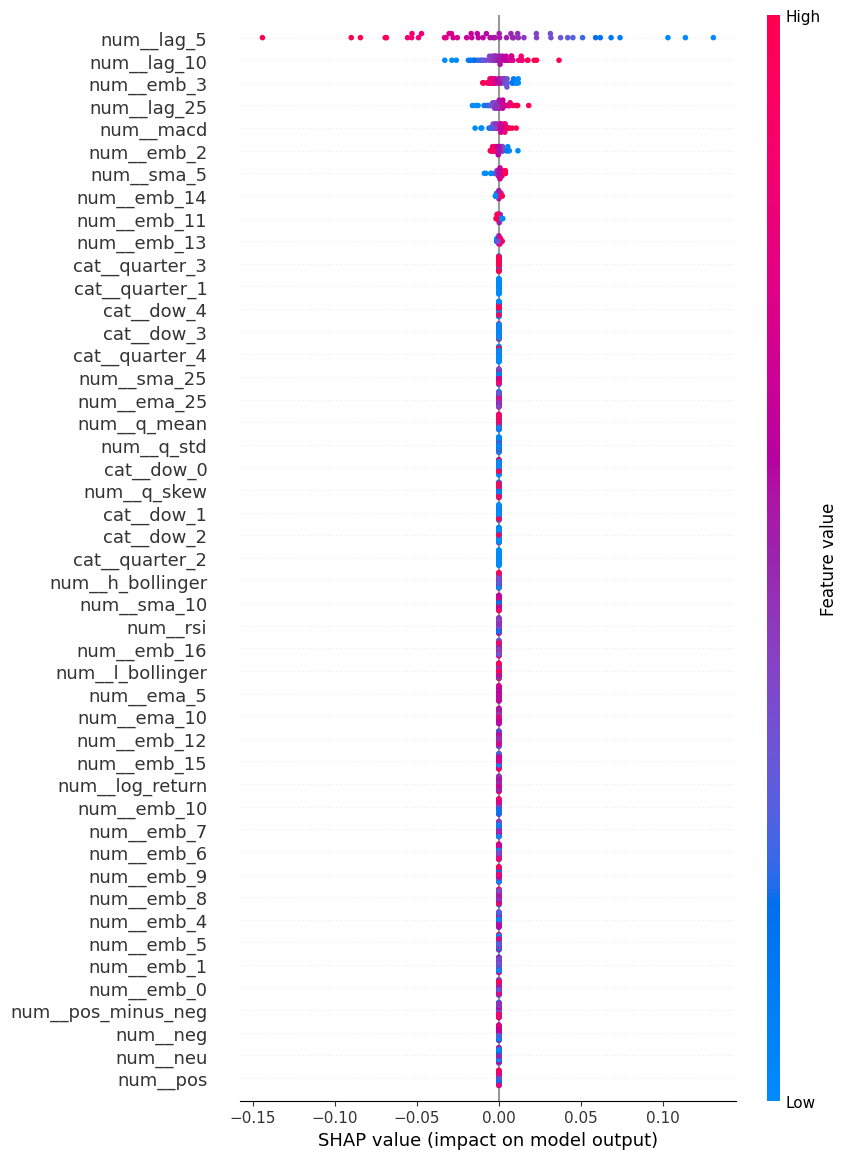

Output/Horizon #29


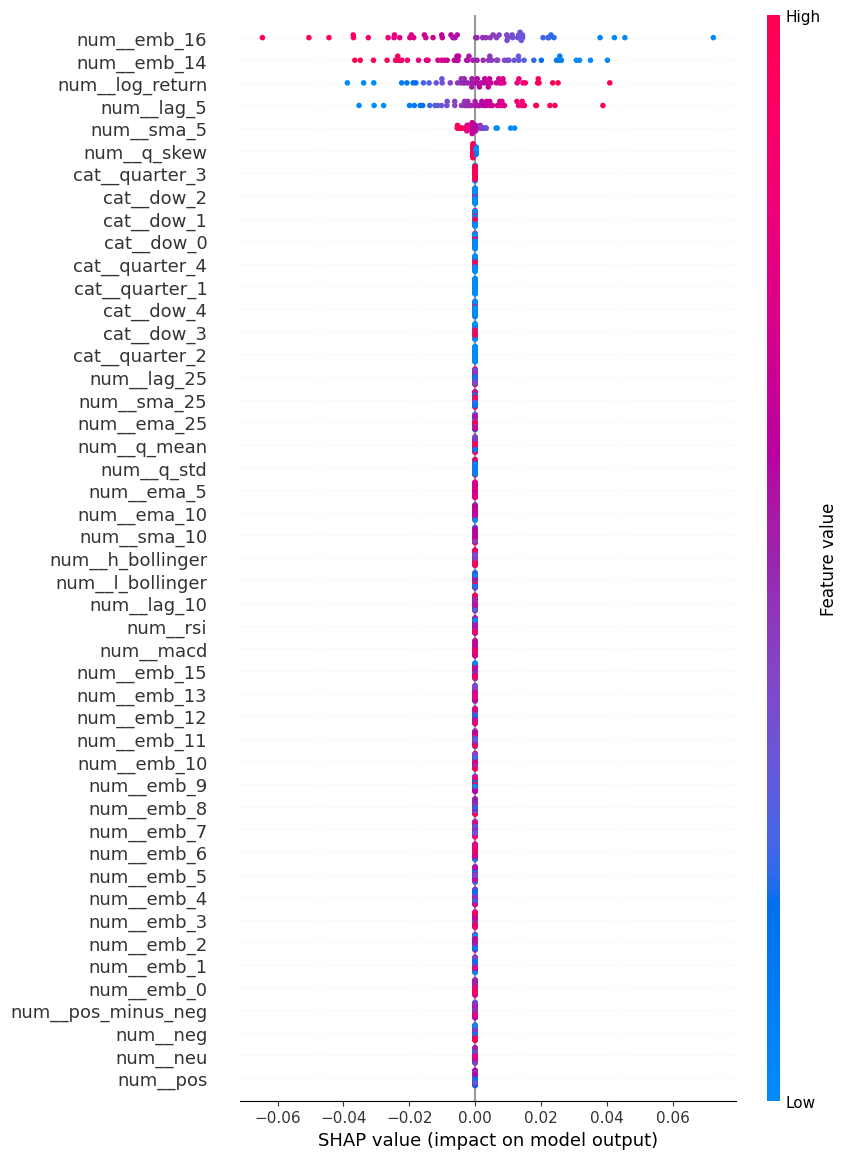

In [8]:
# A) One horizon (e.g., first):
plot_beeswarm_all_features(shap_values, output_idx=0)

# B) All horizons:
plot_beeswarm_all_outputs(shap_values)